# Project_4

### Citation Policy

If you publish material based on databases obtained from this repository, then, in your acknowledgements, please note the assistance you received by using this repository. This will help others to obtain the same data sets and replicate your experiments. We suggest the following pseudo-APA reference format for referring to this repository:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Here is a BiBTeX citation as well:
```json
@misc{Dua:2019,
author = "Dua, Dheeru and Graff, Casey",
year = "2017",
title = "{UCI} Machine Learning Repository",
url = "http://archive.ics.uci.edu/ml",
institution = "University of California, Irvine, School of Information and Computer Sciences" }
```

### Import packages


In [ ]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,f1_score, roc_curve, accuracy_score

In [ ]:
import pickle
import warnings
warnings.filterwarnings('ignore')

### Data loading

In [ ]:
#reading data
data = pd.read_csv("dataset_57_hypothyroid.csv")

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


### Data processing

Then, I decided to throw out some columns that I think that won't be useful in the future steps.

In [ ]:
data.drop(['TT4_measured','T4U_measured','FTI_measured','TBG_measured', 'TSH_measured', 'T3_measured', 'referral_source'],axis=1,inplace=True)

In [ ]:
data.shape

(3772, 23)

From here, I can see that our dataset has 3772 rows and 23 columns. From dataset, I can see that some columns has "?" value - missing value, so in next step I will replace it to NAN value and drop duplicates.

In [ ]:
data=data.replace('?', np.nan)

In [ ]:
data.drop_duplicates(keep = False, inplace = True)

#### Missing values handling and features encoding

Next, I will see if the dataset has missing values and in which columns.

In [ ]:
data.isnull().sum()

age                             1
sex                           148
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           277
T3                            677
TT4                           139
T4U                           295
FTI                           293
TBG                          3678
Class                           0
dtype: int64

In [ ]:
data.shape

(3678, 23)

Since the column "TBG" has many missing values, I decided to delete it.

In [ ]:
del data["TBG"]

In [ ]:
data.describe().T

,count,unique,top,freq
age,3677,93,59,95
sex,3530,2,F,2396
on_thyroxine,3678,2,f,3214
query_on_thyroxine,3678,2,f,3628
on_antithyroid_medication,3678,2,f,3637
sick,3678,2,f,3531
pregnant,3678,2,f,3625
thyroid_surgery,3678,2,f,3625
I131_treatment,3678,2,f,3619
query_hypothyroid,3678,2,f,3444


I will then use the Label Encoder to encode the values of the categorical variables.

In [ ]:
data['sex'] = LabelEncoder().fit_transform(data.sex)
data['I131_treatment'] = LabelEncoder().fit_transform(data['I131_treatment'])
data['sick'] = LabelEncoder().fit_transform(data.sick)
data['pregnant'] = LabelEncoder().fit_transform(data.pregnant)
data['thyroid_surgery'] = LabelEncoder().fit_transform(data['thyroid_surgery'])
data['lithium'] = LabelEncoder().fit_transform(data['lithium'])
data['goitre'] = LabelEncoder().fit_transform(data['goitre'])
data['tumor'] = LabelEncoder().fit_transform(data['tumor'])
data['on_thyroxine'] = LabelEncoder().fit_transform(data['on_thyroxine'])
data['query_on_thyroxine'] = LabelEncoder().fit_transform(data['query_on_thyroxine'])
data['on_antithyroid_medication'] = LabelEncoder().fit_transform(data['on_antithyroid_medication'])
data['query_hyperthyroid'] = LabelEncoder().fit_transform(data['query_hyperthyroid'])
data['query_hypothyroid'] = LabelEncoder().fit_transform(data['query_hypothyroid'])
data['hypopituitary'] = LabelEncoder().fit_transform(data['hypopituitary'])
data['psych'] = LabelEncoder().fit_transform(data.psych)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,negative
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,NaN,negative
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,120,negative
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,NaN,negative
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,negative


In [ ]:
data["Class"].value_counts()

negative                   3387
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

Next, I will encode the Class column so that the value 0 represents a negative class and 1 represents that it is positive, i.e. that it has some type of problem (compensated_hypothyroid, primary_hypothyroid or secondary_hypothyroid).

In [ ]:
data=data.replace({"negative":1,"compensated_hypothyroid":0, "primary_hypothyroid":0, "secondary_hypothyroid":0 })

In [ ]:
data["Class"].value_counts()

1    3387
0     291
Name: Class, dtype: int64

Converting from object to numeric because this shape of data is neccessary for modeling.

In [ ]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes

age                          float64
sex                            int32
on_thyroxine                   int32
query_on_thyroxine             int32
on_antithyroid_medication      int32
sick                           int32
pregnant                       int32
thyroid_surgery                int32
I131_treatment                 int32
query_hypothyroid              int32
query_hyperthyroid             int32
lithium                        int32
goitre                         int32
tumor                          int32
hypopituitary                  int32
psych                          int32
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                          int64
dtype: object

In [ ]:
#checking missing values
data.isnull().sum()

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          277
T3                           677
TT4                          139
T4U                          295
FTI                          293
Class                          0
dtype: int64

I decided to fill the missing values with the median of each column and drop the remaining missing values.

In [ ]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    data[i] = data[i].fillna(data[i].median())

In [ ]:
data.dropna(inplace=True)

#### Outliers handling

In [ ]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,...,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,51.915148,0.388904,0.125918,0.013598,0.011150,0.039978,0.014414,0.014414,0.015774,0.063639,...,0.009247,0.026108,0.000272,0.050041,4.812202,2.011161,108.132662,0.993825,110.203889,0.920859
std,20.145199,0.564132,0.331802,0.115831,0.105019,0.195935,0.119206,0.119206,0.124616,0.244142,...,0.095727,0.159479,0.016491,0.218059,23.609728,0.747712,34.945568,0.187554,31.754224,0.269995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.570000,1.700000,88.000000,0.890000,94.000000,1.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.400000,2.000000,103.000000,0.980000,107.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.500000,2.300000,123.000000,1.070000,122.000000,1.000000
max,455.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000


When I compare the mean and median using this table, I don't see that any attribute has any huge outliers. But, we will see better using next graphs. First I will split continuous columns.

Now, I create a list of continuous columns with idea to check for their outliers later.

In [ ]:
continuous_columns = []
for column_name in data.columns:
    if data[column_name].dtype == float:
        continuous_columns.append(column_name)

In [ ]:
continuous_columns

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [ ]:
df = pd.DataFrame(data, columns=continuous_columns)

<AxesSubplot:>

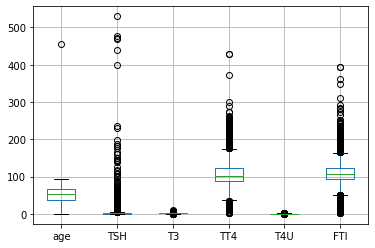

In [ ]:
df.boxplot()

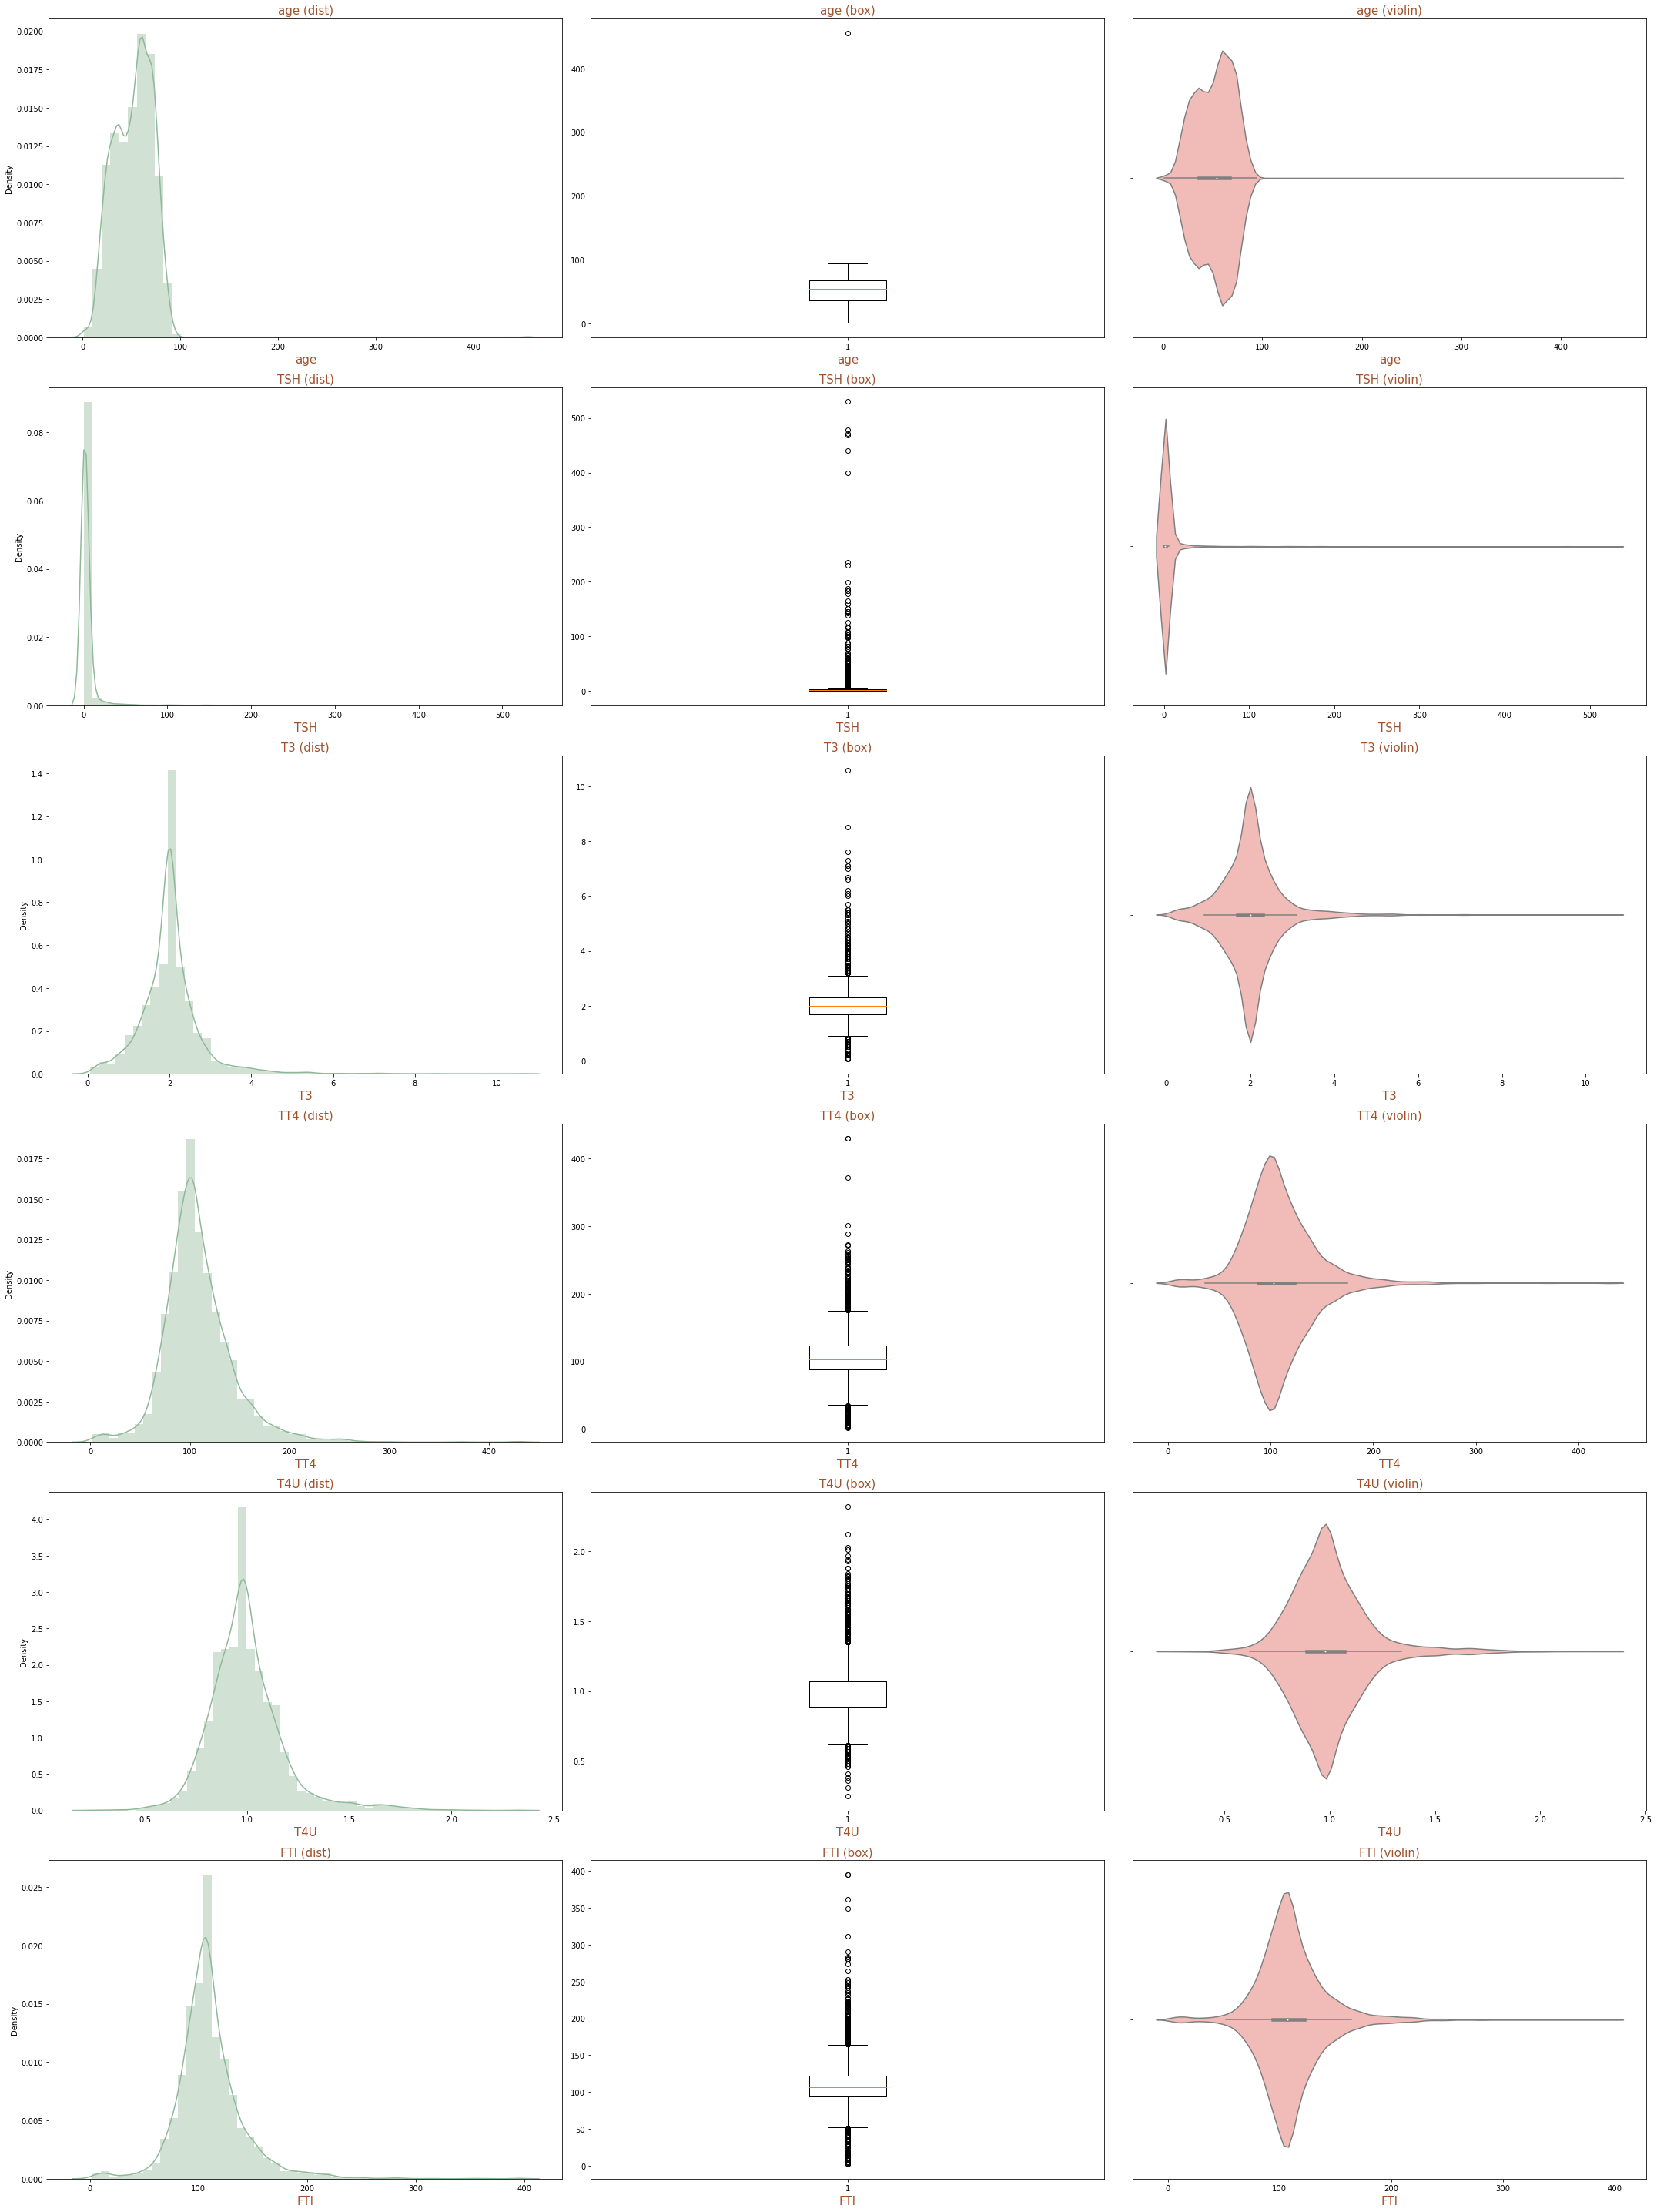

In [ ]:
#  plot numerical data to detect if there are some outliers
a = len(continuous_columns)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,40))

for i in continuous_columns:
    plt.subplot(a, b,c)
    plt.title('{} (dist)'.format(i, a, b, c),
                  family="DejaVu Sans",
                  size=15,
                  color="sienna")
    plt.xlabel(i,
              family="DejaVu Sans",
                  size=15,
                  color="sienna")
    sns.distplot(data[i], color = '#8EB897')
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box)'.format(i, a, b, c),
                  family="DejaVu Sans",
                  size=15,
                  color="sienna")
    plt.xlabel(i,
              family="DejaVu Sans",
                  size=15,
                  color="sienna")
    plt.boxplot(x = data[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (violin)'.format(i, a, b, c),
                  family="DejaVu Sans",
                  size=15,
                  color="sienna")
    plt.xlabel(i,family="DejaVu Sans",
                  size=15,
                  color="sienna")
    sns.violinplot(x = data[i], palette="Pastel1")
    c = c + 1
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
plt.tight_layout()
plt.show()

From graphs it is obvious that there are some untipical values for some features. The strategy is changing values with 95 - percentile.

In [ ]:
def outliers_modification(data, column):
    for i in range(len(data)):
        if data[column][i] > np.percentile(data[column].unique(), 95):
            data[column][i] = np.percentile(data[column].unique(), 95)
    return data

#### Exploring target column

Now, I'll explore the target column a little better.

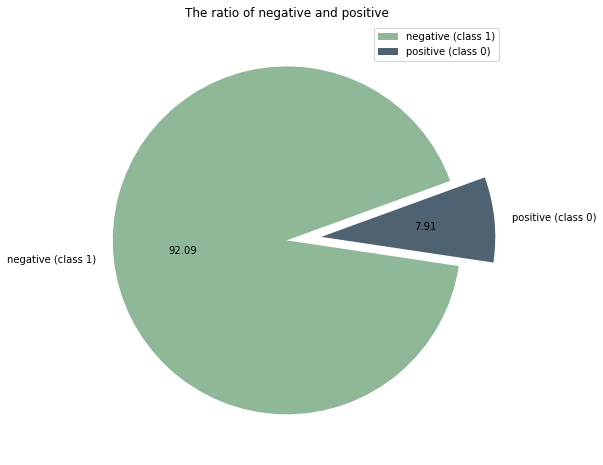

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x=data.Class.value_counts(),
        labels=['negative (class 1)','positive (class 0)'],
        startangle = 20,
        colors=['#8EB897','#4F6272'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.title('The ratio of negative and positive')
plt.legend();
plt.show()

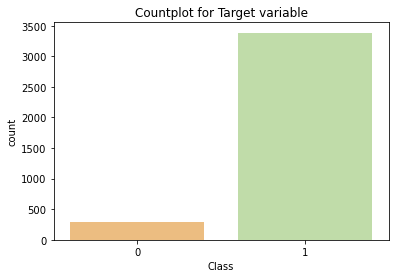

In [ ]:
sns.countplot(x='Class',data=data, palette="Spectral")
plt.title("Countplot for Target variable");
plt.show()

From here I can see that there are many more examples belonging to class 1 than class 0.

I will create table with examples such that they belong to class 0 - positive_df.

In [ ]:
positive_df = data[data.Class==0]

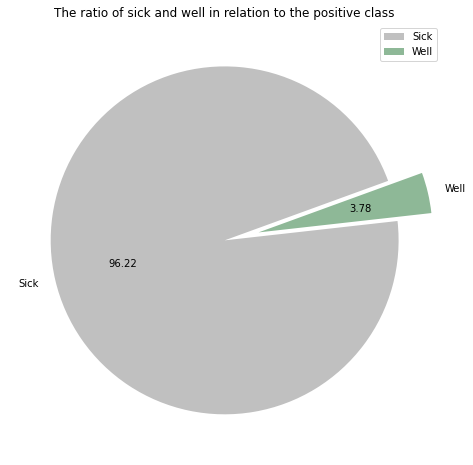

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick', 'Well'],
        startangle = 20,
        colors=['silver', '#8EB897'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.title('The ratio of sick and well in relation to the positive class')
plt.legend();
plt.show()

### Correlation matrix

Correlation between all features of our dataset:

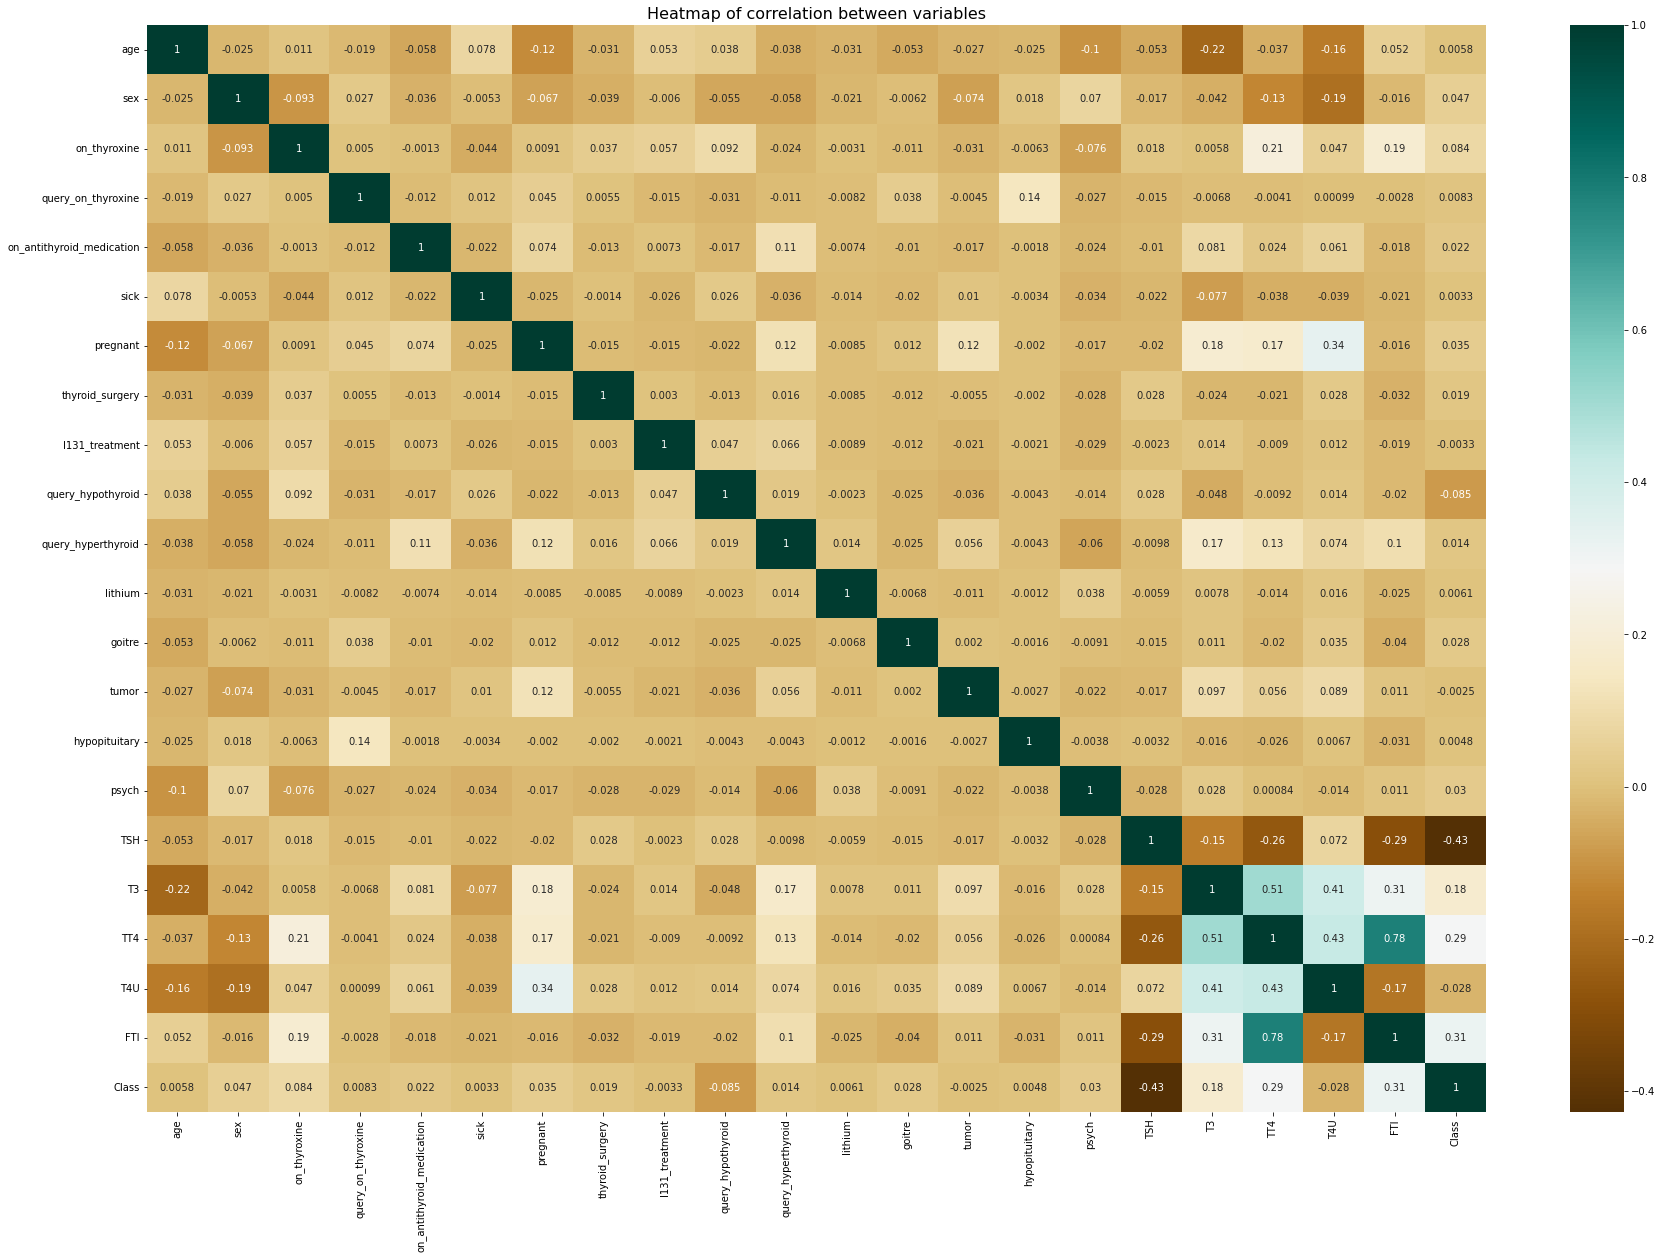

In [ ]:
corrmat=data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(30, 20))
plt.title('Heatmap of correlation between variables',fontsize=16)
graph=sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='BrBG')
plt.show()

From here we can see that there is not a very strong correlation between our target column and the other features.

### Splitting and scaling data

Creating X - all columns except target column.
Creating Y - target column `Class`

In [ ]:
X = data.drop('Class',axis=1)
y = data.Class

Splitting into test and train set in the ratio of 20:80.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

I will use Synthetic Minority Oversampling Technique (SMOTE), a statistical technique for increasing the number of cases in our dataset in a balanced way. The component works by generating new instances from existing minority cases.

In [ ]:
smote = SMOTE(random_state=11)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Shape before the oversampling : ", X_train.shape)
print("Shape after the oversampling : ", x_smote.shape)

Shape before the oversampling :  (2941, 21)
Shape after the oversampling :  (5420, 21)


It is necessary to scale data. I choose the MinMaxScaler.

In [ ]:
scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])

In [ ]:
X_test.TT4 = scalr.fit_transform(X_test[['TT4']])
X_test.age = scalr.fit_transform(X_test[['age']])
X_test.FTI = scalr.fit_transform(X_test[['FTI']])

### Feature importance

The importance of the features will be examined using PCA method. As we could see from the correlation matrix plot, no feature stands out as particularly significant.

In [ ]:
pca = PCA().fit(x_smote)

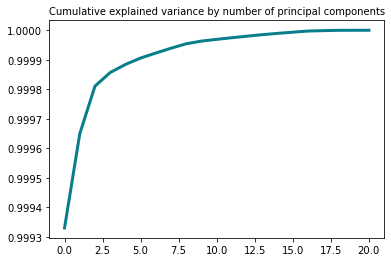

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

Analysis for each feature:

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
age,-0.002955,-0.012478,-0.001136,0.001146,0.001022,0.001015,0.002933,-0.001263,-0.001501,-0.000286,...,0.000190,0.003884,-0.001510,-0.002126,-0.000238,-0.002102,-0.004691,0.038848,0.000168,1.219837e-04
sex,-0.054076,0.006632,0.484838,0.001222,-0.001790,0.001213,0.001513,-0.009120,0.008516,-0.000296,...,-0.001251,0.000038,0.000329,-0.000215,0.000209,-0.000255,0.000020,0.000095,-0.000006,-6.532379e-06
on_thyroxine,-0.021088,0.017897,-0.003081,0.250246,-0.049757,0.001295,-0.002749,0.004989,0.001441,-0.000156,...,-0.004780,-0.008039,0.000981,-0.000696,-0.000867,-0.000647,-0.000202,0.000058,0.000050,-5.673356e-07
query_on_thyroxine,-0.003185,0.001392,0.003745,0.000846,-0.002977,-0.000260,0.002518,-0.002709,0.002876,0.002131,...,0.075413,-0.035600,0.000425,-0.018991,0.009119,-0.010274,0.000023,0.000378,-0.000024,-3.200373e-04
on_antithyroid_medication,-0.002352,0.006545,-0.001150,0.000521,0.000692,0.010901,-0.000955,-0.000253,0.000400,-0.004281,...,-0.004297,-0.009757,-0.002900,0.032419,0.069520,0.006097,0.000264,0.000803,0.000060,-9.679007e-07


I will display this data on next plot.

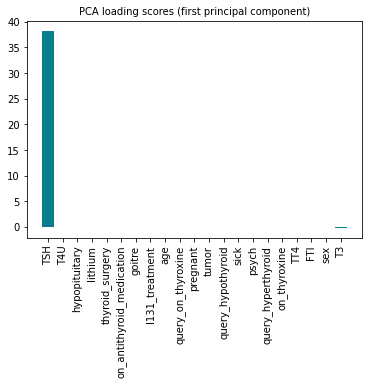

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()

The PCA results are identical to the results given by the correlation matrix - the column that is many more important than the others is `TSH`.

### Cross-validation

Defining function for CV.

In [ ]:
def CV(model, X, Y):
    fitted = model.fit(X, Y)
    accuracy = cross_val_score(fitted, X, Y, cv=10,scoring='accuracy')
    print(accuracy.mean())

Three parameters are passed to the function:
- model
- training data
- test data

The output is mean accuracy of CV scores.

I will check CV for various input data.

In [ ]:
CV(LogisticRegression(), X, y)
CV(KNeighborsClassifier(), X, y)

0.9600284326501599
0.9545892074398769


In [ ]:
CV(LogisticRegression(), x_smote, y_smote)
CV(KNeighborsClassifier(), x_smote, y_smote)

0.9832103321033211
0.9863468634686348


In [ ]:
CV(LogisticRegression(), (X["TSH"].values.reshape(-1, 1))**2, y) # feature with the best corr with target
CV(KNeighborsClassifier(), (X["TSH"].values.reshape(-1, 1))**2, y)

0.9374526122497334
0.9752473048217036


Based on the cells above, it is obvious that the accuracy is highest when implementing the model on scaled data.

### Hyperparameters tuning

Now I will try to find the optimal combination of hyperparameters for the corresponding model using GridSearchCV.

In [ ]:
def grid_search(model, grid):
    gs=GridSearchCV(model, grid, cv=10)
    gs.fit(x_smote, y_smote)
    return gs

In [ ]:
def print_gs_eval(gs):
    # best score achieved during the GridSearchCV
    print('GridSearch CV best score: {:.4f}\n'.format(gs.best_score_))

    # print parameters that give the best results
    print('Parameters that give the best results:', (gs.best_params_))

    # print estimator that was chosen by the GridSearch
    print('\nEstimator that was chosen by the search:', (gs.best_estimator_))

In [ ]:
grid={"C":[0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]} # l1 lasso l2 ridge
model=LogisticRegression()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: 0.9843

Parameters that give the best results: {'C': 0.1, 'penalty': 'l2'}

Estimator that was chosen by the search: LogisticRegression(C=0.1)


In [ ]:
grid={'n_neighbors':np.arange(1, 50)}
model=KNeighborsClassifier()
gs=grid_search(model, grid)

In [ ]:
print_gs_eval(gs)

GridSearch CV best score: 0.9902

Parameters that give the best results: {'n_neighbors': 1}

Estimator that was chosen by the search: KNeighborsClassifier(n_neighbors=1)


I will display score changes for different values for n_neighbors on next plot (implemented on train and test data).

In [ ]:
test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(x_smote, y_smote)

    train_scores.append(knn.score(x_smote, y_smote))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.6413043478261 % and k = [1, 2, 3, 5, 15, 16, 17]


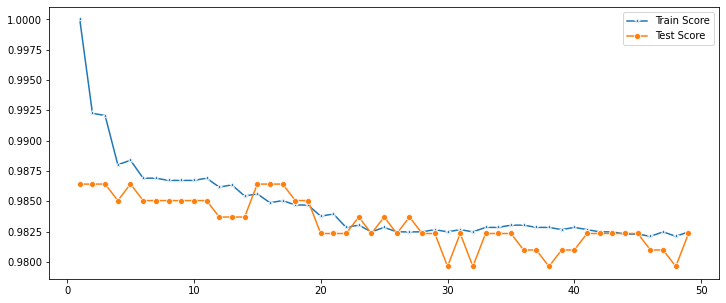

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')
plt.show()

The best result is captured at k = 1 hence 1 is used for the final model

### Metrics calculation

In [ ]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    KNeighborsClassifier(n_neighbors=1):"KNeighbors Classifier",
}

for m in models.keys():
    m.fit(x_smote,y_smote)

for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  98.36956521739131 %
Accuracy Score for KNeighbors Classifier is :  98.6413043478261 %


As we can see, a bit higher accuracy has KNN model. I will check some other metrics.

In [ ]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        60
           1       0.99      1.00      0.99       676

    accuracy                           0.98       736
   macro avg       0.97      0.92      0.94       736
weighted avg       0.98      0.98      0.98       736

----------------------------------------------------------
Classification Report for KNeighbors Classifier
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        60
           1       1.00      0.99      0.99       676

    accuracy                           0.99       736
   macro avg       0.93      0.99      0.96       736
weighted avg       0.99      0.99      0.99       736

----------------------------------------------------------


In most cases, the KNN model has better metric values. Let's see ROC curve for both of models.

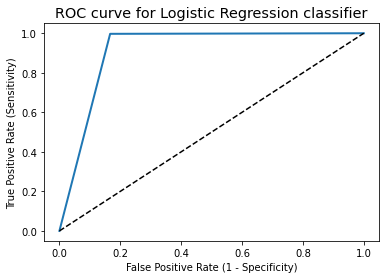

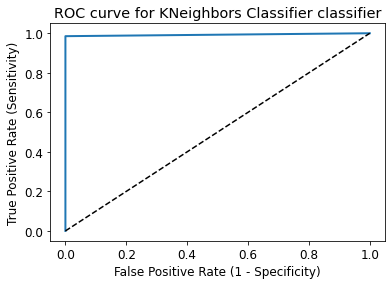

In [ ]:
for model, name in models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title(f'ROC curve for {name} classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

#### Check for overfitting and underfitting

In [ ]:
for model,name in models.items():
    y_pred = model.predict(X_train)
    print(f"Training set score for {name}")
    print(model.score(X_train, y_train))
    print(" ")
    print(f"Test set score for {name}")
    print(model.score(X_test, y_test))
    print("----------------------------------------------------------")
    print(" ")

Training set score for Logistic Regression
0.9241754505270316
 
Test set score for Logistic Regression
0.9836956521739131
----------------------------------------------------------
 
Training set score for KNeighbors Classifier
0.9384563073784427
 
Test set score for KNeighbors Classifier
0.9864130434782609
----------------------------------------------------------
 


These values are quite comparable. So, there is no overfitting or underfitting case there.